In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

In [2]:
import seaborn as sns
import matplotlib.patches as mpatches

In [3]:
rt_visual=pd.read_csv('all_reviews_films4.csv')
rt_visual=rt_visual.drop('Unnamed: 0',axis=1)

rt_visual.sample(7)

,Title,Year,Review,TMeter,TMeter1
6306,Last Ride,2012,There were some clear issues with the story an...,0.93,1.0
6106,Kodachrome,2018,What are we to make of director Mark Rasos ove...,0.71,1.0
4634,Green Room,2016,A shabby white power outpost in the Oregon boo...,0.90,1.0
8629,Project X,1987,A combination of expose on Air Force experimen...,0.79,1.0
4159,Fred: The Movie,2010,"The s a A because it contains ""behaviour that ...",0.00,0.0
2193,Cane Toads: The Conquest,2012,"The is horrible, true (more or less) and ofte...",0.88,1.0
11771,The Lifeguard,2013,What the desperately needed was some original...,0.13,0.0


__Wordcloud of most used words in reviews of all critics grouped by film:__

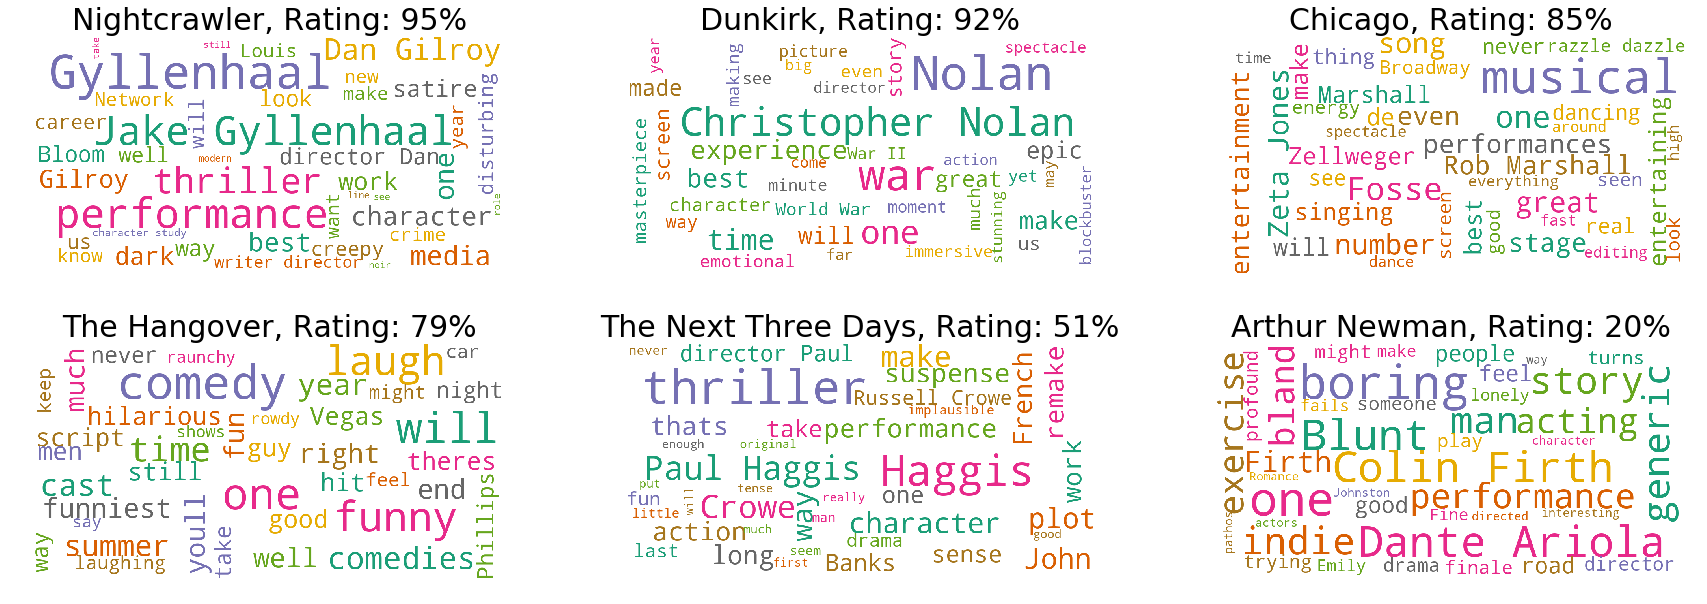

In [4]:
stopwords = set(STOPWORDS)

list_titles=['Nightcrawler','Dunkirk','Chicago','The Hangover','The Next Three Days','Arthur Newman']

text=0

def show_wordcloud(text, title = None):

    for i in range(6):
        
        index=rt_visual.index[rt_visual['Title']==list_titles[i]][0]
        text =rt_visual['Review'].loc[index]

        wordcloud = WordCloud(
            background_color='white',
            stopwords=stopwords,
            max_words=40,
            max_font_size=40, 
            scale=3,
            random_state=1,
            colormap='Dark2'
            
        ).generate(str(text))

        fig = plt.figure(1, figsize=(30, 10))
        fig.add_subplot(2,3,i+1).set_title(list_titles[i]+', Rating: '+str(int(rt_visual['TMeter'].loc[index]*100))+'%',
                                       fontsize=30)
        fig.subplots_adjust(hspace=0.3)

        plt.axis('off')

        plt.imshow(wordcloud)
        
        fig.savefig('wordcloud.png')
    plt.show()

show_wordcloud(text)


In [5]:
rt_visual1=rt_visual.groupby(['TMeter']).count().reset_index()
rt_visual1.head()

,TMeter,Title,Year,Review,TMeter1
0,0.00,149,149,149,149
1,0.01,6,6,6,6
2,0.02,12,12,12,12
3,0.03,23,23,23,23
4,0.04,36,36,36,36


In [6]:
rt_visual1.loc[rt_visual1['TMeter'] >=0.6, 'TMeter2'] = 'red'
rt_visual1.loc[rt_visual1['TMeter'] <0.6, 'TMeter2'] = 'green'

rt_visual1.head()

,TMeter,Title,Year,Review,TMeter1,TMeter2
0,0.00,149,149,149,149,green
1,0.01,6,6,6,6,green
2,0.02,12,12,12,12,green
3,0.03,23,23,23,23,green
4,0.04,36,36,36,36,green


In [7]:
rt_visual2=rt_visual.groupby(['TMeter1']).count().reset_index()
rt_visual2.head()

,TMeter1,Title,Year,Review,TMeter
0,0.0,5477,5477,5477,5477
1,1.0,8851,8851,8851,8851


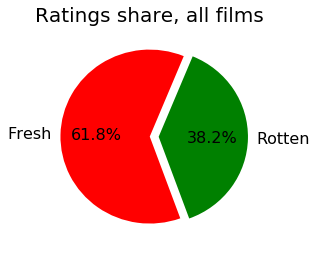

In [16]:
fig = plt.figure(figsize=(4, 4))
explode = (0.1, 0)

ax=plt.pie(x="Title",data=rt_visual2,labels=['Rotten','Fresh'],colors=['green','red'],
           explode=explode,autopct='%1.1f%%',textprops={'fontsize': 16},startangle=290)

plt.title("Ratings share, all films",fontsize=20)
fig.savefig('pie.png')
plt.show()

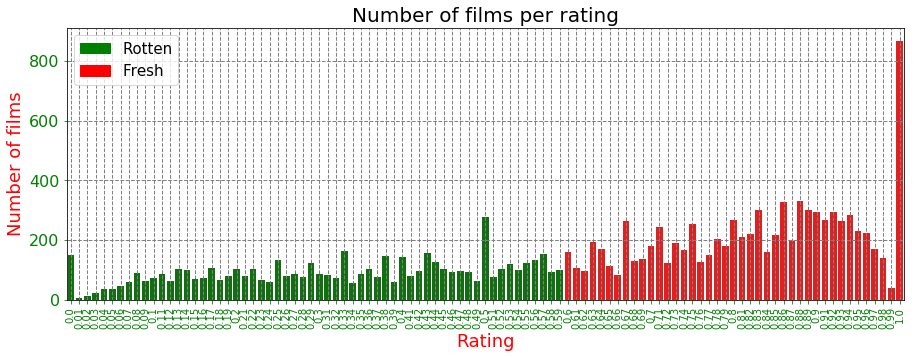

In [15]:
fig = plt.figure(figsize=(15, 5))

ax=sns.barplot(x="TMeter", y="Title", data=rt_visual1,n_boot=100,palette=np.array(rt_visual1['TMeter2']))

ax.grid(True, linestyle='--', linewidth=1, color="gray")
ax.set_xticklabels(rt_visual1['TMeter'].unique(), rotation=90,fontsize=13)

ax.tick_params(axis='x', colors='green',labelsize=10)
ax.tick_params(axis='y', colors='green',labelsize=16)

ax.set_xlabel("Rating",fontsize=18)
ax.set_ylabel("Number of films",fontsize=18)

ax.yaxis.label.set_color('red') 
ax.xaxis.label.set_color('red')

ax.set_title("Number of films per rating",fontsize=20)


green_patch = mpatches.Patch(color='green', label='Rotten')
red_patch = mpatches.Patch(color='red', label='Fresh')
ax.legend(handles=[green_patch,red_patch],loc=2,fontsize=15)

plt.show()

In [17]:
rt_visual3=rt_visual.groupby(['Year','TMeter1']).count().reset_index()
rt_visual3.head()

,Year,TMeter1,Title,Review,TMeter
0,1915,1.0,1,1,1
1,1916,1.0,1,1,1
2,1919,1.0,1,1,1
3,1920,1.0,3,3,3
4,1921,1.0,3,3,3


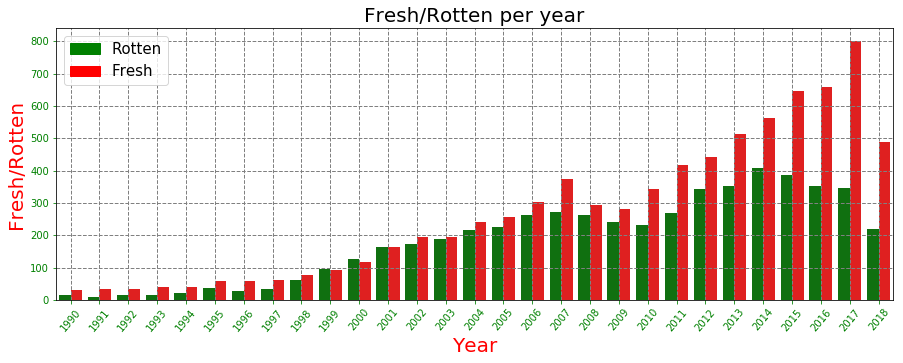

In [21]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Year", y="Title", hue="TMeter1", data=rt_visual3[rt_visual3['Year']>=1990], palette=['green','red'])

ax.grid(True, linestyle='--', linewidth=1, color="gray")

ax.set_xticklabels(rt_visual3[rt_visual3['Year']>=1990]['Year'].unique(), rotation=50)

ax.tick_params(axis='x', colors='green',labelsize=10)
ax.tick_params(axis='y', colors='green',labelsize=10)

ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("Fresh/Rotten",fontsize=20)

ax.yaxis.label.set_color('red') 
ax.xaxis.label.set_color('red')

ax.set_title("Fresh/Rotten per year",fontsize=20)

green_patch = mpatches.Patch(color='green', label='Rotten')
red_patch = mpatches.Patch(color='red', label='Fresh')
ax.legend(handles=[green_patch,red_patch],loc=2,fontsize=15)
fig.savefig('fresh_rott_year.png')
plt.show()